### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

In this project, the independent variables are the words which are congruent with the color or not. The depentdent variables are the response time.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

An appropriate null hypotheses would be the response time for two different categories of words are not statistically different. We can use t-test to help us examine this hypothessis, since it's a good test for two sample comparison.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [7]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
# Read data
data = pd.read_csv('stroopdata.csv')
Congruent = data['Congruent'].values.tolist()
Incongruent = data['Incongruent'].values.tolist()

# Mean
Congruent_mean = np.mean(Congruent)
Incongruent_mean = np.mean(Incongruent)
print('Sample mean for Congruent and Incongruent are', Congruent_mean, Incongruent_mean)

# Variance
Congruent_std = np.sqrt(np.sum((Congruent - Congruent_mean)**2)/(len(Congruent)-1))
Incongruent_std = np.sqrt(np.sum((Incongruent - Incongruent_mean)**2)/(len(Incongruent)-1))
print('Standard deviation for Congruent and Incongruent are', Congruent_std, Incongruent_std)

Sample mean for Congruent and Incongruent are 14.051125 22.0159166667
Standard deviation for Congruent and Incongruent are 3.55935795765 4.79705712247


In this part, we calculated the mean and variance for each test. We can find there is a big difference on the mean and variance between each each other.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

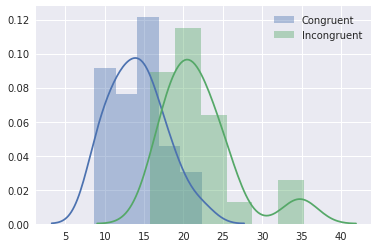

In [9]:
# Build the visualizations here
import seaborn as sns
sns.set(color_codes=True)

# plot Congruent and Incongruent data
sns.distplot(Congruent, label = 'Congruent')
sns.distplot(Incongruent, label = 'Incongruent')
plt.legend()

As we can find, when we draw the sample distributions in the same graph, the mean for two the datasets are far away from each other. It also shows are the significant difference between the response time of the two tests.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [10]:
# Perform the statistical test here
# Run t-test
d = np.diff([Congruent, Incongruent], axis = 0)
d_mean = np.mean(d)
d_std = np.sqrt(np.sum((d - d_mean)**2)/(len(Congruent)-1))
d_SE = d_std/np.sqrt(len(Congruent))
T = d_mean/d_SE
print('By formula, t_score=', T)

# By stats package 
t_score, p_value = stats.ttest_rel(Congruent, Incongruent)
print('By scipy package, t_score, p_value =', t_score, p_value)

# critical value for t-test
# For a 95% confidence interval with two-tail, the critical value will be
t_critical = stats.t.ppf(0.975, len(Congruent)-1)
print('t_critical value =', t_critical)

By formula, t_score= 8.02070694411
By scipy package, t_score, p_value = -8.02070694411 4.10300058571e-08
t_critical value = 2.06865761042


As we can find, the t_score from t test is much bigger than the t critical value, which means the test rejected the null hypothesis, and the data from Incongruent is significanlly different from the Congruent. It matches our expectation.